In [225]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#1.1 Load the Data

AirQuality = pd.read_csv('global_air_quality (1).csv')
AirQuality

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,...,NaN,NaN,6.29,NaN,13.74,10.01 [6.29-13.74],NaN,NaN,EN,2022-08-12 00:00:00
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,...,NaN,NaN,7.44,NaN,12.55,10.02 [7.44-12.55],NaN,NaN,EN,2022-08-12 00:00:00
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,...,NaN,NaN,9.73,NaN,10.39,10.06 [9.73-10.39],NaN,NaN,EN,2022-08-12 00:00:00
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,GRD,Grenada,Year,2019,...,NaN,NaN,7.07,NaN,13.20,10.08 [7.07-13.20],NaN,NaN,EN,2022-08-12 00:00:00
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,...,NaN,NaN,8.23,NaN,12.46,10.09 [8.23-12.46],NaN,NaN,EN,2022-08-12 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BLZ,Belize,Year,2010,...,NaN,NaN,3.91,NaN,20.28,9.92 [3.91-20.28],NaN,NaN,EN,2022-08-12 00:00:00
9446,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2010,...,NaN,NaN,7.80,NaN,12.89,9.92 [7.80-12.89],NaN,NaN,EN,2022-08-12 00:00:00
9447,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2010,...,NaN,NaN,6.30,NaN,13.57,9.94 [6.30-13.57],NaN,NaN,EN,2022-08-12 00:00:00
9448,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,USA,United States of America,Year,2010,...,NaN,NaN,9.78,NaN,10.11,9.95 [9.78-10.11],NaN,NaN,EN,2022-08-12 00:00:00


In [27]:
#1.2 Make a New Column

AirQuality["PM25_Value"] = AirQuality["Value"]
AirQuality['PM25_Value'] = AirQuality['Value'].str.extract(r'^([\d\.]+)')
PM25_Value = AirQuality['PM25_Value']
print(AirQuality[['PM25_Value', 'Value']])

(9450, 35)

In [99]:
#1.3 Calculate Average PM2.5 Concentration

AirQuality['PM25_Value'] = pd.to_numeric(AirQuality['PM25_Value'], errors='coerce')
ParLoc = AirQuality.groupby(['ParentLocation']).sum()
ParLoc['Average_PM25'] = ParLoc['PM25_Value']/9949
print(ParLoc[['Location', 'PM25_Value','Average_PM25']])

                                                                Location  \
ParentLocation                                                             
Africa                 KenyaMauritiusMauritiusMauritiusNamibiaMauriti...   
Americas               Trinidad and TobagoGrenadaBrazilGrenadaGrenada...   
Eastern Mediterranean  MoroccoMoroccoMoroccoSomaliaMoroccoMoroccoSoma...   
Europe                 United Kingdom of Great Britain and Northern I...   
South-East Asia        MaldivesMaldivesMaldivesMaldivesMaldivesBhutan...   
Western Pacific        JapanJapanJapanJapanSingaporeSingaporeSingapor...   

                       PM25_Value  Average_PM25  
ParentLocation                                   
Africa                   69760.73      7.011833  
Americas                 24751.28      2.487816  
Eastern Mediterranean    42244.04      4.246059  
Europe                   50036.26      5.029275  
South-East Asia          17358.72      1.744770  
Western Pacific          18287.12      1.

In [115]:
#1.4 Analyze Data

HighQual = np.max(ParLoc['Average_PM25'])
print(HighQual)
#Since the maximum average comes out to be 7.011833, we can deduce that Africa has the highest 
#Air Quality based on the average since 7.011833 is in Africa's Row.

7.0118333500854355


In [119]:
#1.5 Save the Processed Data

UpdatedData = ParLoc[['Location', 'PM25_Value','Average_PM25']]
UpdatedData.to_csv('UpdatedData.csv')

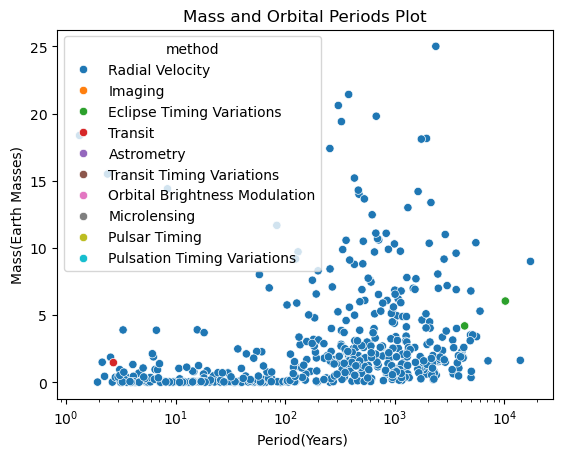

In [351]:
#2.1 Create a Scatter plot
#Use sns instead of plt
ExoPlanet = sns.load_dataset('planets')
ExoPlanet
ax = sns.scatterplot(ExoPlanet, x="orbital_period", y="mass", hue = "method")
plt.xlabel("Period(Years) ")
plt.ylabel("Mass(Earth Masses)")
ax.set_xscale('log')
plt.title("Mass and Orbital Periods Plot")
plt.show()

<Figure size 1400x800 with 0 Axes>

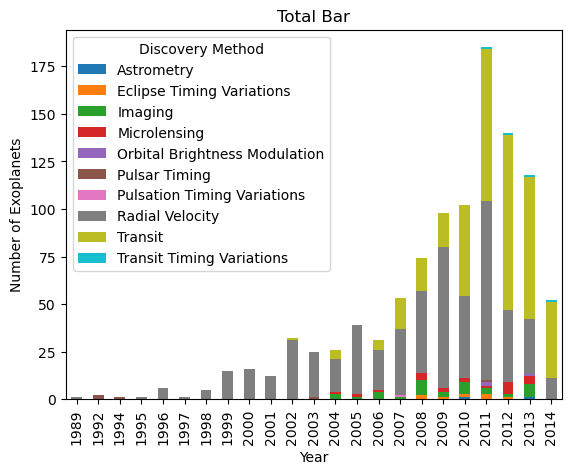

In [367]:
#2.2 Create a Bar Chart
ExoPlanet
DiscCount = ExoPlanet.groupby(['year', 'method']).size().reset_index(name='count')
DiscPivot = DiscCount.pivot_table(index='year', columns='method', values='count', fill_value=0)
plt.figure(figsize=(14, 8))
DiscPivot.plot(kind='bar', stacked=True)
plt.title("Total Bar")
plt.xlabel("Year")
plt.ylabel("Number of Exoplanets")
plt.legend(title="Discovery Method")
plt.show()